In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [214]:
n = 2

In [215]:
w = cp.Variable(n)
#x = cp.Variable(n)
b = cp.Variable()


In [216]:
x = np.array([[-1,-1],[-2,-2],[1,1],[2,2]])
y = np.array([[-1],[-1],[1],[1]])

In [217]:
def loss_fn(w):
    return cp.pnorm(w,p=2)**2

In [218]:
def get_constraint():
    cons = []
    for i in range(n):
        cons.append(y[i]*(w.T*x[i] + b)>=1)
    return cons

In [219]:
obj = cp.Minimize(loss_fn(w))
prob = cp.Problem(obj,get_constraint())
prob.solve()

-5.817076415426757e-10

In [220]:
prob.value


-5.817076415426757e-10

In [221]:
b.value

array(-1.95966346)

## Iris Dataset

In [4]:
data_df = pd.read_csv("iris_data.csv")
data_df = data_df.drop(['Sepal_Width','Petal_Length'],axis=1)
data = data_df.values
data_df.head()

,Sepal_Length,Petal_Width,label
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa


In [5]:
X = data[:,0:2]
y = np.array([1 if i == "Iris-setosa" else -1 for i in data[:,-1] ])

In [225]:
w = cp.Variable(2)
b = cp.Variable()
cons = []
for i in range(X.shape[0]):
    cons.append((y[i]*(w*X[i].T + b))>=1)

In [226]:
obj = cp.Minimize(loss_fn(w))
prob = cp.Problem(obj,cons)
prob.solve()

24.999999990815127

In [233]:
y_hat = w*X.T + b
y_hat = [1 if i>0 else -1 for i in y_hat.value]

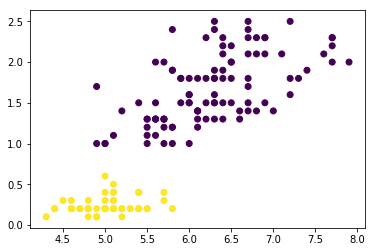

In [234]:
plt.scatter(X[:,0],X[:,1],c = y_hat)

## ii

In [276]:
#Dual Values
supp = []
for i in range(X.shape[0]):
    print cons[i].dual_value
    if cons[i].dual_value>0.05:
        supp.append(i)


6.00876399688e-11
5.96578191675e-11
5.9265601134e-11
5.90822271448e-11
5.98677340346e-11
1.23146272356e-10
7.84174342795e-11
5.98677340346e-11
5.87385248157e-11
4.77878323519e-11
6.08142170795e-11
5.94572932248e-11
4.76557239242e-11
4.70617687995e-11
6.19715092805e-11
1.26714975494e-10
1.23146272356e-10
8.01256616757e-11
8.29880381644e-11
8.01256616757e-11
6.08142170795e-11
1.20219920809e-10
5.90822271448e-11
2.40699221449e-10
5.94572932248e-11
5.98677340346e-11
1.19391037623e-10
6.03181947169e-11
6.03181947169e-11
5.9265601134e-11
5.94572932248e-11
1.23146272356e-10
4.82155136688e-11
6.10813672625e-11
4.77878323519e-11
5.98677340346e-11
6.10813672625e-11
4.77878323519e-11
5.87385248157e-11
6.00876399688e-11
7.97425782941e-11
7.81313056382e-11
5.87385248157e-11
24.9999977129
1.20219920809e-10
7.90413774333e-11
6.00876399688e-11
5.90822271448e-11
6.05601210513e-11
5.98677340346e-11
5.70000326486e-11
4.6273708794e-11
4.59307699543e-11
7.77737513383e-11
4.61990640628e-11
7.73037614541e-11

In [277]:
supp

[43, 57, 60, 62, 67, 79, 81, 93]

## Decision Boundary Plot

In [248]:
x0 = []
x1 = []
x2 = []
for i in np.linspace(4,8,100):
    for j in np.linspace(0,2.5,100):
        x = np.array([[i],[j]])
        y_pred = w.T*x + b
        if y_pred.value <0.1 and y_pred.value >-0.1:
            x0.append(x)
        if y_pred.value <1.1 and y_pred.value >0.9:
            x1.append(x)
        if y_pred.value >-1.1 and y_pred.value <-0.9:
            x2.append(x)   
x0 = np.array(x0)

#print x0
x0 = x0.reshape(x0.shape[0],x0.shape[1])
x1 = np.array(x1)
x1 = x1.reshape(x1.shape[0],x1.shape[1])
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1])

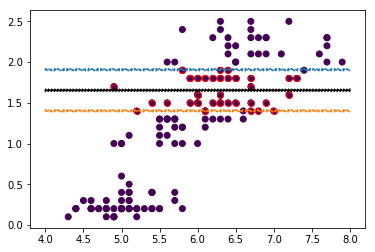

In [369]:
fig = plt.figure()
ax = fig.add_subplot(111)
y_hat = w*X.T + b
y_hat = [1 if i>0 else -1 for i in y_hat.value]
y0 = [0 for i in range(x0.shape[0])]
ax.scatter(X[:,0],X[:,1],c = y_hat)
for i in supp:
    ax.scatter(X[i,0],X[i,1],c = y_hat[i],  facecolors='none',edgecolors= "r")
ax.plot(x0[:,0],x0[:,1],color = "black")
ax.plot(x1[:,0],x1[:,1],linestyle = "--")
ax.plot(x2[:,0],x2[:,1],linestyle = "--")


## Using Sklearn

In [207]:
clf = SVC(kernel='linear')
clf.fit(X, y) 
W = clf.coef_
b  = clf.intercept_

In [210]:
x0 = []
x1 = []
x2 = []
for i in np.linspace(4,8,100):
    for j in np.linspace(0,2.5,100):
        x = np.array([[i],[j]])
        y_pred = np.dot(W,x) + b
        #print y_pred
        if any(y_pred <0.1) and any(y_pred >-0.1):
            x0.append(x)
        if any(y_pred <1.1) and any(y_pred>0.9):
            x1.append(x)
        if any(y_pred >-1.1) and any(y_pred <-0.9):
            x2.append(x)   
x0 = np.array(x0)
#print x1
x0 = x0.reshape(x0.shape[0],x0.shape[1])
x1 = np.array(x1)
x1 = x1.reshape(x1.shape[0],x1.shape[1])
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1])

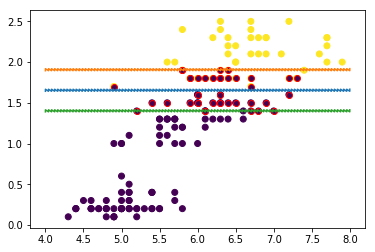

In [368]:
fig = plt.figure()
ax = fig.add_subplot(111)
y_hat = clf.predict(X)
y_hat = [1 if i>0 else -1 for i in y_hat]
supp = clf.support_

y0 = [0 for i in range(x0.shape[0])]
ax.scatter(X[:,0],X[:,1],c = y_hat)
for i in supp:
    ax.scatter(X[i,0],X[i,1],c = y_hat[i],  facecolors='none',edgecolors= "r")
ax.plot(x0[:,0],x0[:,1])
ax.plot(x1[:,0],x1[:,1])
ax.plot(x2[:,0],x2[:,1])

In [111]:
np.dot(W,x)

array([[-0.01528872]])

In [34]:
n = 2
m = 150

In [35]:
w = cp.Variable(n)
#x = cp.Variable(n)
b = cp.Variable()
e = cp.Variable(m)

In [36]:
X = data[:,0:2]
y = np.array([1 if i == "Iris-virginica" else -1 for i in data[:,-1] ])

In [37]:
def loss_fn(w,e):
    return cp.pnorm(w,p=2)**2 + cp.sum(e)

In [38]:
cons = []
for i in range(X.shape[0]):
    cons.append(y[i]*(w.T*X[i] + b)>=(1-e[i]))
for i in range(150):
    cons.append(e[i]>=0)
for i in range(X.shape[0]):
    cons.append(e[i]<=1)

In [39]:
obj = cp.Minimize(loss_fn(w,e))
prob = cp.Problem(obj,cons)
prob.solve()

149.9999944911023

In [40]:
print b.value

-1.5820187093725125e-07


In [41]:
x0 = []
x1 = []
x2 = []
for i in np.linspace(4,8,100):
    for j in np.linspace(0,2.5,100):
        x = np.array([i,j])
        y_pred = w*x.T + b
        #print y_pred.value
        if y_pred.value <0.1 and y_pred.value >-0.1:
            x0.append(x)
        if y_pred.value <1.1 and y_pred.value >0.9:
            x1.append(x)
        if y_pred.value >-1.1 and y_pred.value <-0.9:
            x2.append(x)   
x0 = np.array(x0)

#print x1
x0 = x0.reshape(x0.shape[0],x0.shape[1])

In [42]:

y_hat = w*X.T + b
y_hat = [1 if i>0 else -1 for i in y_hat.value]
y0 = [0 for i in range(x0.shape[0])]


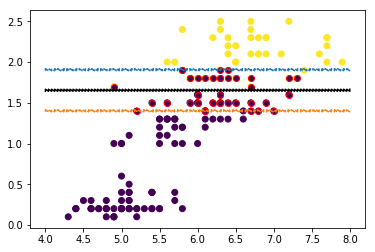

In [367]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0],X[:,1],c = y_hat)
for i in supp:
    ax.scatter(X[i,0],X[i,1],c = y_hat[i],  facecolors='none',edgecolors= "r")
ax.plot(x0[:,0],x0[:,1],color = "black")
ax.plot(x1[:,0],x1[:,1],linestyle = "--")
ax.plot(x2[:,0],x2[:,1],linestyle = "--")

In [362]:
clf = SVC(kernel='linear')
clf.fit(X, y) 
W = clf.coef_
b  = clf.intercept_

In [363]:
x0 = []
x1 = []
x2 = []
for i in np.linspace(4,8,100):
    for j in np.linspace(0,2.5,100):
        x = np.array([[i],[j]])
        y_pred = np.dot(W,x) + b
        #print y_pred
        if any(y_pred <0.1) and any(y_pred >-0.1):
            x0.append(x)
        if any(y_pred <1.1) and any(y_pred>0.9):
            x1.append(x)
        if any(y_pred >-1.1) and any(y_pred <-0.9):
            x2.append(x)   
x0 = np.array(x0)
#print x1
x0 = x0.reshape(x0.shape[0],x0.shape[1])
x1 = np.array(x1)
x1 = x1.reshape(x1.shape[0],x1.shape[1])
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1])

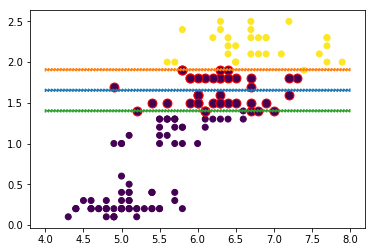

In [370]:
fig = plt.figure()
ax = fig.add_subplot(111)
y_hat = clf.predict(X)
y_hat = [1 if i>0 else -1 for i in y_hat]
supp = clf.support_

y0 = [0 for i in range(x0.shape[0])]
ax.scatter(X[:,0],X[:,1],c = y_hat)
for i in supp:
    ax.scatter(X[i,0],X[i,1],c = y_hat[i], s = 80, facecolors='none',edgecolors= "r")
ax.plot(x0[:,0],x0[:,1])
ax.plot(x1[:,0],x1[:,1])
ax.plot(x2[:,0],x2[:,1])

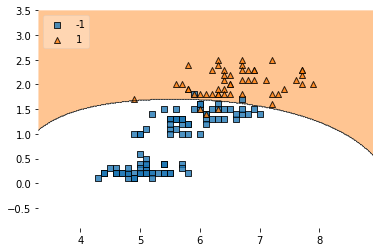

In [28]:
clf = SVC(degree=3,kernel="rbf",gamma=0.2)
clf.fit(X, y) 
X = np.array(X,dtype = "float")
plot_decision_regions(X=X, y=y,clf=clf, legend=2)


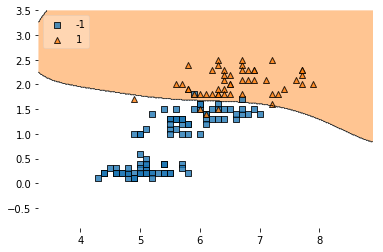

In [31]:
clf = SVC(degree=3,kernel="rbf",gamma="auto")
clf.fit(X, y) 
X = np.array(X,dtype = "float")
plot_decision_regions(X=X, y=y,clf=clf, legend=2)


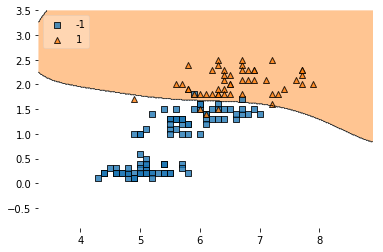

In [32]:
clf = SVC(degree=10,kernel="rbf",gamma=0.5)
clf.fit(X, y) 
X = np.array(X,dtype = "float")
plot_decision_regions(X=X, y=y,clf=clf, legend=2)
